In [28]:
#up to date 
import pandas as pd
order = pd.read_csv(".\data\Orders.csv")
returns = pd.read_csv(".\data\Returns.csv")
import re
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[$]', '', x)) #remove $ signs
order['Profit'] = order['Profit'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Sales'] = order['Sales'].apply(lambda x: re.sub('[,]', '', x)) #remove , signs
order['Profit'] = pd.to_numeric(order['Profit'])
order['Sales'] = pd.to_numeric(order['Sales'])
order["Order.Date"] = pd.to_datetime(order["Order.Date"])
order["Ship.Date"] = pd.to_datetime(order["Ship.Date"])

merged = order.merge(returns, how='outer', left_on= "Order.ID", right_on="Order ID")
merged['Returned'] = ['No' if ans != 'Yes' else 'Yes' for ans in merged['Returned']] #NAN -> no
merged['Returned'] = merged['Returned'].astype('category')

merged['Process.Time'] = merged['Ship.Date'] - merged['Order.Date']
merged['Process.Time'] = merged['Process.Time'].dt.days #removes 'days'

merged.loc[:, "Postal.Code"] = merged.loc[:, "Postal.Code"].fillna("None")

merged["Month"] = merged["Order.Date"].dt.month

In [29]:
returned_orders = merged.groupby(['Product.ID', 'Process.Time', 'Returned'])['Product.ID'].count()
returned_orders.head()

Product.ID   Process.Time  Returned
FUR-BO-3174  2             No          1
             6             No          1
FUR-BO-3175  0             No          1
             2             No          3
             4             No          3
Name: Product.ID, dtype: int64

In [30]:
merged.columns

Index(['Row.ID', 'Order.ID', 'Order.Date', 'Ship.Date', 'Ship.Mode',
       'Customer.ID', 'Customer.Name', 'Segment', 'Postal.Code', 'City',
       'State', 'Country', 'Region_x', 'Market', 'Product.ID', 'Category',
       'Sub.Category', 'Product.Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping.Cost', 'Order.Priority', 'Returned', 'Order ID',
       'Region_y', 'Process.Time', 'Month'],
      dtype='object')

In [46]:
final = merged.drop(columns=['Returned','Order.Date','Ship.Date','State','Country','Market','Postal.Code','City','Row.ID', 'Order.ID', 'Customer.ID', 'Customer.Name', 'Product.ID', 'Order ID', 'Region_y', 'Product.Name'])
final.head()

,Ship.Mode,Segment,Region_x,Category,Sub.Category,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,Process.Time,Month
0,First Class,Consumer,Central US,Technology,Phones,221.98,2,0.0,62.15,40.77,High,2,11
1,First Class,Consumer,Central US,Furniture,Bookcases,341.96,2,0.0,54.71,25.27,High,2,11
2,Second Class,Corporate,Oceania,Furniture,Chairs,3709.40,9,0.1,-288.77,923.63,Critical,2,2
3,Second Class,Corporate,Oceania,Technology,Copiers,344.68,2,0.1,34.42,65.35,Critical,2,2
4,Second Class,Corporate,Oceania,Office Supplies,Storage,133.92,5,0.1,-6.03,41.64,Critical,2,2


In [47]:
# Differentiate numerical features (minus the target) and categorical features
categorical_features = final.select_dtypes(include = ["object"]).columns
numerical_features = final.select_dtypes(exclude = ["object"]).columns

#numerical_features = numerical_features.drop("SalePrice")
#print("Numerical features : " + str(len(numerical_features)))
#print("Categorical features : " + str(len(categorical_features)))
#train_num = train[numerical_features]
#train_cat = train[categorical_features]
print(categorical_features)
print(numerical_features)

Index(['Ship.Mode', 'Segment', 'Region_x', 'Category', 'Sub.Category',
       'Order.Priority'],
      dtype='object')
Index(['Sales', 'Quantity', 'Discount', 'Profit', 'Shipping.Cost',
       'Process.Time', 'Month'],
      dtype='object')


In [36]:
#X = pd.get_dummies(final[categorical_features], drop_first=True, dummy_na = True)
#X.head()

,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,Ship.Mode_nan,Segment_Corporate,Segment_Home Office,Segment_nan,Region_x_Caribbean,Region_x_Central Africa,Region_x_Central America,...,Sub.Category_Paper,Sub.Category_Phones,Sub.Category_Storage,Sub.Category_Supplies,Sub.Category_Tables,Sub.Category_nan,Order.Priority_High,Order.Priority_Low,Order.Priority_Medium,Order.Priority_nan
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [48]:
X = pd.get_dummies(final, drop_first=True, dummy_na = True)
X.head()

,Sales,Quantity,Discount,Profit,Shipping.Cost,Process.Time,Month,Ship.Mode_Same Day,Ship.Mode_Second Class,Ship.Mode_Standard Class,...,Sub.Category_Paper,Sub.Category_Phones,Sub.Category_Storage,Sub.Category_Supplies,Sub.Category_Tables,Sub.Category_nan,Order.Priority_High,Order.Priority_Low,Order.Priority_Medium,Order.Priority_nan
0,221.98,2,0.0,62.15,40.77,2,11,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,341.96,2,0.0,54.71,25.27,2,11,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,3709.40,9,0.1,-288.77,923.63,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,344.68,2,0.1,34.42,65.35,2,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,133.92,5,0.1,-6.03,41.64,2,2,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [61]:
y = merged['Returned'].apply(lambda x: 1 if x=="Yes" else 0).astype('float') # 1 = returned
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Returned, dtype: float64

In [ ]:
### Problem 5: Fitting Models
- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` 
function from `caret` package that does a **stratified** random split of the data. Scikit-learn also has a [StratifiedKfold]
(http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn-model-selection-stratifiedkfold) 
 #function that does similar thing.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so dont spend too much time on grid search. Focus on model 
 evaluation and the business use case of each model.

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [63]:
from sklearn.linear_model import LogisticRegression
# Since this is an imbalanced dataset, setting class_weight='balanced' will give us a better result
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
LR = LogisticRegression(class_weight='balanced')
LR.fit(X_train, y_train)
y_predict = LR.predict(X_test)

C:\Users\asus\Anaconda2\envs\ipykernel_py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [64]:
from sklearn.metrics import confusion_matrix, roc_auc_score
confusion_matrix(y_test, y_predict)

array([[5174, 4640],
       [ 207,  237]], dtype=int64)

In [65]:
# This is an imbalanced dataset so I would achieve more than 95% accuracy rate even if I always predict 'No'. 
# In this case, accuracy is not a good metric. ROC curve or F1 score works better for this task.
roc_auc_score(y_test, y_predict)

0.5304949079913417

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, max_depth=9, class_weight='balanced', n_jobs=-1)
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)

In [67]:
confusion_matrix(y_test, y_predict)

array([[8784, 1030],
       [ 361,   83]], dtype=int64)

In [68]:
roc_auc_score(y_test, y_predict)

0.5409924138526135

In [ ]:
#################################################################################

In [121]:
returned_orders = merged.groupby(['Product.ID', 'Process.Time', 'Returned'])['Product.ID'].count().sort_values(ascending = False)
print( returned_orders.values)
returned_orders.head() #returns

[51 43 37 ...  1  1  1]


Product.ID   Process.Time  Returned
OFF-FA-6129  4             No          51
             5             No          43
             2             No          37
             6             No          31
OFF-BI-3737  4             No          30
Name: Product.ID, dtype: int64

In [130]:
#filter yes
returned_orders[returned_orders.index.labels[2] == 1].groupby([returned_orders[returned_orders.index.labels[2] == 1].values]).count()

1    1898
2     143
3       9
4       1
5       1
Name: Product.ID, dtype: int64

In [137]:
yes = merged[merged['Returned'] == 'Yes']

In [95]:
returned_orders.index.labels[1] #process time

FrozenNDArray([2, 6, 0, 2, 4, 7, 2, 4, 4, 5, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 1, 2, 4, 5, 6, 7, 1, 2, 4, 4, 5, 6, 7, 0, 1, 2, 3, 4, 5, 6, 0, 2, 3, 4, 5, 6, 7, 0, 2, 3, 4, 5, 5, 2, 1, 1, 2, 3, 4, 5, 6, 7, 3, 4, 4, 5, 5, 6, 7, 2, 3, 4, 5, 0, 2, 4, 4, 5, 6, 7, 0, 1, 2, 4, 5, 5, 6, 7, 1, 2, 3, 3, 4, 5, 6, 6, 7, 0, 2, ...], dtype='int8')

In [109]:
returned_orders[returned_orders.index.labels[2] == 1].index.labels[1]

FrozenNDArray([4, 6, 4, 5, 1, 7, 4, 5, 4, 5, 3, 6, 4, 5, 4, 5, 5, 1, 2, 5, 7, 0, 4, 4, 4, 4, 4, 6, 2, 1, 6, 5, 4, 4, 5, 6, 1, 5, 6, 2, 0, 4, 3, 4, 5, 5, 4, 6, 1, 5, 4, 5, 2, 4, 4, 2, 5, 6, 4, 5, 1, 3, 2, 3, 4, 5, 5, 4, 6, 4, 4, 1, 5, 0, 3, 5, 5, 2, 4, 2, 4, 7, 4, 7, 2, 4, 5, 5, 7, 2, 4, 5, 4, 4, 5, 6, 4, 6, 5, 3, ...], dtype='int8')

In [110]:
returned_orders[returned_orders.index.labels[2] == 1].values

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

ValueError: `bins` must increase monotonically, when an array

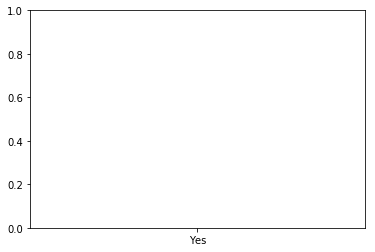

In [139]:
import matplotlib.pyplot as plt
# Looking for outliers, as indicated in https://ww2.amstat.org/publications/jse/v19n3/decock.pdf
plt.hist(yes['Returned'], yes['Process.Time'])
plt.xlabel("Process Time")
plt.ylabel("Returns")
plt.show()

#train = train[train.GrLivArea < 4000] #remove outliers

#var = 'GrLivArea'
#data = pd.concat([train['SalePrice'], train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [ ]:
plt.bar(returned_orders[returned_orders.index.labels[2] == 1].index.labels[1], returned_orders[returned_orders.index.labels[2] == 1].values)
plt.xlabel("Process Time")
plt.ylabel("Returns")
plt.show()

In [ ]:
### Problem 6: Evaluating Models
- What is the best metric to evaluate your model. Is accuracy good for this case?
- Now you have multiple models, which one would you pick? 
- Can you get any clue from the confusion matrix? What is the meaning of precision and recall in this case? Which one do you care 
 the most? How will your model help the manager make decisions?
- **Note:** The last question is open-ended. Your answer could be completely different depending on your understanding of this business 
 problem.

In [ ]:
### Problem 7: Feature Engineering Revisit
- Is there anything wrong with the new feature we generated? How should we fix it?
- ***Hint***: For the real test set, we do not know it will get returned or not.